In [1]:
import warnings
warnings.filterwarnings('ignore')

# Dataset Creation

In [2]:
import pandas as pd
import numpy as np
import random

# Number of samples
n_samples = 1000

# Generate random ticket IDs
ticket_ids = range(10001, 10001 + n_samples)

# Dummy customer texts (just for illustration, in a real-world scenario these will be more diverse and meaningful)
customer_texts = [
    "I can't log into my account.",
    "The application is crashing frequently.",
    "How do I reset my password?",
    "The system is too slow.",
    "Data is not syncing across devices.",
    "I received a wrong bill.",
    "The UI is not user-friendly.",
    "My payment got declined.",
    "I am facing issues with the new update.",
    "How do I backup my data?"
]

# Randomly assign customer texts to ticket IDs
texts = [random.choice(customer_texts) for _ in range(n_samples)]

# Severity levels
severities = ["low", "medium", "high", "critical"]

# Randomly assign severity levels to ticket IDs
severity_labels = [random.choice(severities) for _ in range(n_samples)]

# Create a DataFrame
df = pd.DataFrame({
    "ticket_id": ticket_ids,
    "customer_text": texts,
    "severity": severity_labels
})

df.head()


,ticket_id,customer_text,severity
0,10001,How do I backup my data?,critical
1,10002,The application is crashing frequently.,low
2,10003,The system is too slow.,low
3,10004,How do I backup my data?,critical
4,10005,The system is too slow.,medium


# Text cleaning or Text Pre-processing

In [3]:
import re
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from langdetect import detect

# Download necessary resources for NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(text):
    # 2. Convert to lowercase
    text = text.lower()
    
    # 7. Remove HTML tags
    clean = re.compile('<.*?>')
    text = re.sub(clean, '', text)
    
    # 9. Remove URLs
    text = re.sub(r'http\S+', '', text)
    
    # 8. Remove special characters (excluding space)
    text = re.sub(r'[^a-z\s]', '', text)
    
    # 10. Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # 3. Tokenize
    tokens = word_tokenize(text)
    
    # 1. Stopword removal
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # 4. Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    
    # 5. Lemmatizing
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # 11. Remove extra whitespaces
    text = " ".join(tokens)
    
    # 12. Sentence segmentation
    sentences = sent_tokenize(text)
    
    # 13. Language detection (just an example, you might need a more robust solution)
    lang = detect(text)
    
    # 14. Code switching detection (not implementing as it's quite involved and requires additional tools)
    # 15. N-gram generation (example for bigrams; you can adjust for other n-grams)
    bigrams = list(nltk.bigrams(tokens))
    
    # 16. Noise reduction (not implementing as it's specific to the dataset and might need manual rules)
    
    # Rejoining cleaned tokens to form the cleaned text
    cleaned_text = ' '.join(tokens)
    
    return cleaned_text, lang, bigrams

# Example:
text = "Your sample text with <html> tags </html> and https://example.com URLs."
cleaned_text, detected_lang, generated_bigrams = preprocess_text(text)

print(f"Cleaned Text: {cleaned_text}")
print(f"Detected Language: {detected_lang}")
print(f"Generated Bigrams: {generated_bigrams}")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator.DESKTOP-
[nltk_data]     QSF3VEN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator.DESKTOP-
[nltk_data]     QSF3VEN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Administrator.DESKTOP-
[nltk_data]     QSF3VEN\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Cleaned Text: sampl text tag url
Detected Language: sv
Generated Bigrams: [('sampl', 'text'), ('text', 'tag'), ('tag', 'url')]


In [4]:
# Assuming the function preprocess_text is already defined as above and df is our dataframe

# Applying the function to our dataframe's "complaints" column
df['customer_text'] = df['customer_text'].apply(lambda x: preprocess_text(x)[0])

# If you're interested in capturing detected language and bigrams as well:
df['detected_lang'] = df['customer_text'].apply(lambda x: preprocess_text(x)[1])
df['bigrams'] = df['customer_text'].apply(lambda x: preprocess_text(x)[2])

df.head()

,ticket_id,customer_text,severity,detected_lang,bigrams
0,10001,backup data,critical,id,"[(backup, data)]"
1,10002,applic crash frequent,low,en,"[(applic, crash), (crash, frequent)]"
2,10003,system slow,low,cs,"[(system, slow)]"
3,10004,backup data,critical,id,"[(backup, data)]"
4,10005,system slow,medium,cs,"[(system, slow)]"


# EDA for Supervised Text Classification

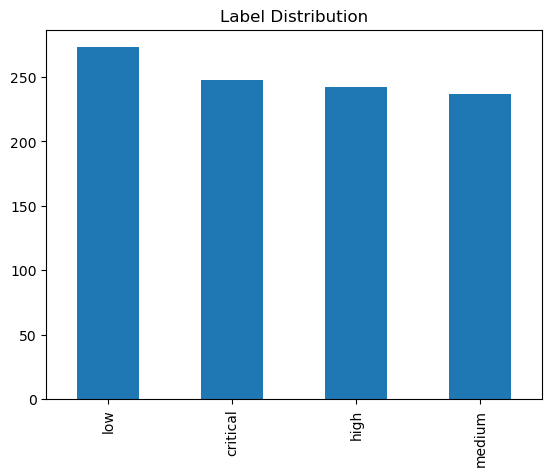

In [5]:
# 1. Label Distribution

import seaborn as sns
import matplotlib.pyplot as plt

df['severity'].value_counts().plot(kind='bar')
plt.title('Label Distribution')
plt.show()

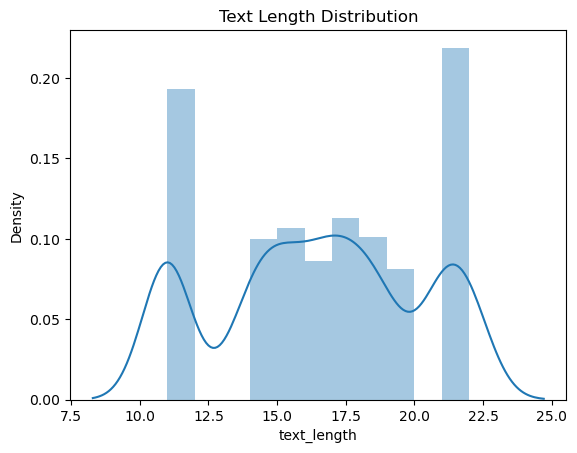

In [6]:
#2 Text Length Distributions

df['text_length'] = df['customer_text'].apply(len)
sns.distplot(df['text_length'])
plt.title('Text Length Distribution')
plt.show()


In [7]:
# Most Least Frequent Words
from collections import Counter

all_words = ' '.join(df['customer_text']).split()
word_freq = Counter(all_words)
print("Most Common Words:", word_freq.most_common(10))
print("Least Common Words:", word_freq.most_common()[:-10-1:-1])


Most Common Words: [('data', 205), ('applic', 118), ('crash', 118), ('frequent', 118), ('receiv', 113), ('wrong', 113), ('bill', 113), ('ui', 107), ('userfriendli', 107), ('backup', 104)]
Least Common Words: [('updat', 81), ('new', 81), ('issu', 81), ('face', 81), ('account', 86), ('log', 86), ('cant', 86), ('slow', 89), ('system', 89), ('password', 100)]


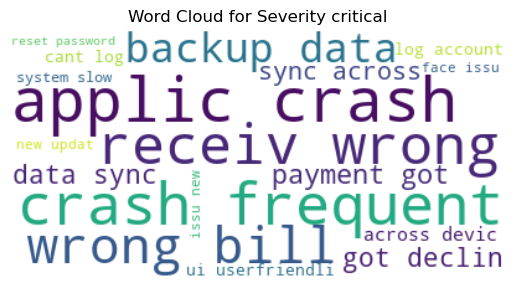

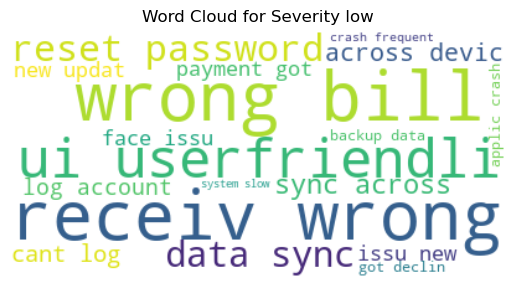

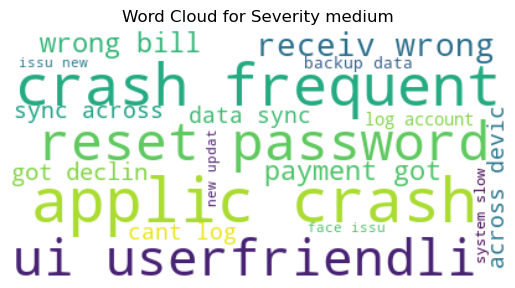

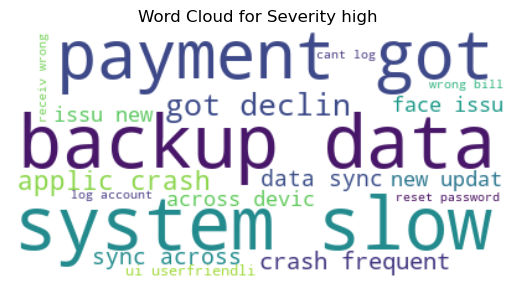

In [8]:
#word clouds for Each Label
from wordcloud import WordCloud

for label in df['severity'].unique():
    subset = df[df['severity'] == label]
    all_text = ' '.join(subset['customer_text'])
    wordcloud = WordCloud(background_color='white').generate(all_text)
    plt.figure()
    plt.title(f"Word Cloud for Severity {label}")
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()


# Word Vectors using FastText

In [9]:
# Pre-processing
from nltk.tokenize import word_tokenize
tokenized_texts = df['customer_text'].apply(lambda x: word_tokenize(x))


In [10]:
# Training FastText Embeddings
from gensim.models import FastText

# Train a FastText model
model_fasttext = FastText(sentences=tokenized_texts, vector_size=200, window=5, min_count=5, workers=4, sg=1, epochs=100)


In [11]:
# 3. Preparing Vectorized Data

def word_vector_ft(tokens, size, model_fasttext):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_fasttext.wv[word]
            count += 1.
        except KeyError:
            continue
    if count != 0:
        vec /= count
    return vec

wordvec_arrays = np.zeros((len(tokenized_texts), 200))
for i in range(len(tokenized_texts)):
    wordvec_arrays[i, :] = word_vector_ft(tokenized_texts[i], 200, model_fasttext)

X_fasttext = wordvec_arrays


In [12]:
#4. Model Training and Evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

y = df['severity']

X_train, X_test, y_train, y_test = train_test_split(X_fasttext, y, test_size=0.2, random_state=42)

logreg_fasttext = LogisticRegression()
logreg_fasttext.fit(X_train, y_train)

y_pred = logreg_fasttext.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.26

Classification Report:
               precision    recall  f1-score   support

    critical       0.00      0.00      0.00        49
        high       0.37      0.24      0.29        59
         low       0.21      0.70      0.32        43
      medium       0.42      0.16      0.24        49

    accuracy                           0.26       200
   macro avg       0.25      0.27      0.21       200
weighted avg       0.26      0.26      0.21       200



# Heatmap

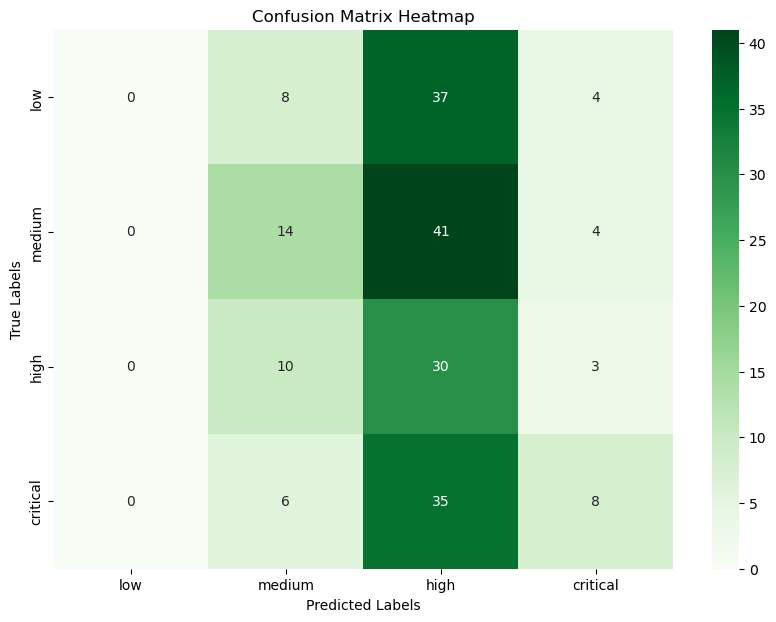

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming y_test are the true labels and y_pred are the predicted labels
y_pred = logreg_fasttext.predict(X_test)
confusion_mat = confusion_matrix(y_test, y_pred)
labels = ['low', 'medium', 'high', 'critical']

plt.figure(figsize=(10,7))
sns.heatmap(confusion_mat, annot=True, cmap='Greens', fmt='g', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()


In [29]:
def word_vector_ft(tokens, size, model_fasttext):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_fasttext.wv[word]
            count += 1.
        except KeyError:  # If the word isn't in the FastText model, ignore it
            continue
    if count != 0:
        vec /= count
    return vec.flatten()



def predict_new_data_fasttext(new_data, model, model_fasttext):
    processed_data = preprocess_new_data_fasttext(new_data, model_fasttext)
    print(processed_data.shape)  # Add this line to check the shape
    prediction = model.predict([processed_data])
    return prediction[0]



new_ticket = "The application is crashing frequently."
predicted_severity = predict_new_data_fasttext(new_ticket, logreg_fasttext, model_fasttext)
print(f"The predicted severity for the ticket is: {predicted_severity}")


(200,)
The predicted severity for the ticket is: medium
